# Problem Statement:
You work for an online retailer, and one of your company's tasks is to examine user reviews of different products. It is your responsibility to compile a report that categorizes the products according to user reviews.
Dataset Information:
The Reviews.csv dataset contains 60145 rows and 10 columns.


1. Analyze the customer reviews data, perform EDA and statistical tests to gather insights
about the products.
a. Highest and lowest rating for the products. Percentage wise product ratings for
the entire data.
b. Total number of reviews by unique profiles. How many customers or profiles have
reviewed more than one product?
2. Perform sentiment analysis on the reviews data, and classify the reviews based on the
sentiment associated with the same

In [1]:
import numpy as np
import pandas as pd


In [2]:
# Importing libraries

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
#To track function execution
from tqdm import tqdm
from bs4 import BeautifulSoup

#Libraries for Sentimental analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Libraries for visualization
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Libraries for ML
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

ModuleNotFoundError: No module named 'wordcloud'

In [3]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Capstone Project 2 Review E-Commerce (1).ipynb',
 'Capstone Project Problem 1.ipynb',
 'Reviews.csv',
 'Walmart DataSet.csv']

In [4]:
# Reading dataframe
df = pd.read_csv(r"Reviews.csv")

In [5]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [16]:
df.shape

(568454, 10)

In [18]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [19]:
df[df["ProfileName"].isnull()]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
25509,25510,B000LKZB4Y,A36BVYD0NT7Z0F,NaN,0,0,5,1314576000,These are the best mints and no aspartame or BHT,I was so shocked to find out that almost all g...
38874,38875,B000AYDGZ2,A36BVYD0NT7Z0F,NaN,2,3,1,1278374400,doesn't anyone care that they are putting BHT ...,I called Kellogg's to see why Special K red be...
49800,49801,B000CRHQN0,A2LYFY32LXQDON,NaN,0,0,2,1282608000,They were melted and the chocolate had turned ...,We love these bars but i won't order them ship...
67077,67078,B0006348H2,A2P0P67Y55SNOX,NaN,1,1,5,1314662400,Wheatgrass,Kitty seems to like this sprinkled on her food...
106550,106551,B001EQ5DG0,A1P500QXEG3IUZ,NaN,0,0,5,1326758400,Finally!,"You cannot find this in the stores anymore, it..."
137613,137614,B000CQE3HS,AGT3BYX5P9SLH,NaN,0,0,5,1324684800,awesome,i love them they are amazing I would eat them ...
163191,163192,B000CQID1A,AGT3BYX5P9SLH,NaN,0,0,5,1324684800,awesome,i love them they are amazing I would eat them ...
172462,172463,B001FA1L9I,AC9U70TRGPDGJ,NaN,0,0,5,1289520000,very good,came in proper packaging. Have loved British ...
297275,297276,B007OXJM6E,A29D7XVSBCLFLD,NaN,0,0,1,1325203200,Burnt,The last SEVERAL time we bought this it tasted...
306751,306752,B000RI1W8E,AGT3BYX5P9SLH,NaN,0,0,5,1324684800,awesome,i love them they are amazing I would eat them ...


In [20]:
# Dropping Null values
df.dropna(inplace=True)

In [21]:
# Checking if null value exist again
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [23]:
#  Checking the columns of the reviews.
df.columns


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [24]:
#Checking the shape of the dataframe.
df.shape

(568411, 10)

In [25]:
# Checking for the info of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568411 non-null  int64 
 1   ProductId               568411 non-null  object
 2   UserId                  568411 non-null  object
 3   ProfileName             568411 non-null  object
 4   HelpfulnessNumerator    568411 non-null  int64 
 5   HelpfulnessDenominator  568411 non-null  int64 
 6   Score                   568411 non-null  int64 
 7   Time                    568411 non-null  int64 
 8   Summary                 568411 non-null  object
 9   Text                    568411 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [26]:
# Statistical analysis of the dataframe.
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568411.000000,568411.000000,568411.000000,568411.000000,5.684110e+05
mean,284227.440964,1.743874,2.227876,4.183309,1.296261e+09
std,164099.020907,7.636781,8.288752,1.310368,4.803792e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,142114.500000,0.000000,0.000000,4.000000,1.271290e+09
50%,284224.000000,0.000000,1.000000,5.000000,1.311120e+09
75%,426341.500000,2.000000,2.000000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.000000,5.000000,1.351210e+09


In [27]:
# Checking number of reviews for each score.
df["Score"].value_counts()

5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64

In [28]:
##Exploratory Data Analysis

# Note that more than 75% of our data is belonging to positive class(Score=4,5), i.e. we have imbalanced dataset.


# 1. Analyze the customer reviews data, perform EDA and statistical tests to gather insights about the products.



# a. Highest and lowest rating for the products. Percentage wise product ratings for the entire data.

In [84]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,word_count,cleaned_text,sentimental_scores,compound_sentiment,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,bought several vitality canned dog food produc...,"{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp...",0.9441,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,product arrived labeled jumbo salted peanuts p...,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...",-0.5664,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,99,confection around centuries light pillowy citr...,"{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'co...",0.8265,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,43,looking secret ingredient robitussin believe f...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,30,great taffy great price wide assortment yummy ...,"{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp...",0.9468,1


In [85]:

df.groupby('ProductId')['Score'].max()

ProductId
0006641040    5
141278509X    5
2734888454    5
2841233731    5
7310172001    5
             ..
B009UOFTUI    1
B009UOFU20    1
B009UUS05I    5
B009WSNWC4    5
B009WVB40S    5
Name: Score, Length: 74258, dtype: int64

In [86]:
df.groupby('ProductId')['Score'].min()

ProductId
0006641040    1
141278509X    5
2734888454    2
2841233731    5
7310172001    1
             ..
B009UOFTUI    1
B009UOFU20    1
B009UUS05I    5
B009WSNWC4    5
B009WVB40S    5
Name: Score, Length: 74258, dtype: int64

In [87]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,word_count,cleaned_text,sentimental_scores,compound_sentiment,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,bought several vitality canned dog food produc...,"{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp...",0.9441,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,product arrived labeled jumbo salted peanuts p...,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...",-0.5664,0


In [92]:
df.groupby('Score')["ProfileName"].unique()

Score
1    [dll pa, LT, lady21, Roberto A, gary sturrock,...
2    [Karl, Erica Neathery, Bill Shirer, Jen, Wilhe...
3    [K. A. Freel, kbogo "shoelover", JMay, Roel Tr...
4    [Natalia Corres "Natalia Corres", Twoapennythi...
5    [delmartian, Michael D. Bigham "M. Wassir", Da...
Name: ProfileName, dtype: object

In [95]:
review_counts = df.groupby(['ProfileName', 'Score'], as_index=False).count()
review_counts

,ProfileName,Score,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,word_count,cleaned_text,sentimental_scores,compound_sentiment,sentiment
0,,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,,5,1,1,1,1,1,1,1,1,1,1,1,1,1
2,,5,2,2,2,2,2,2,2,2,2,2,2,2,2
3,,5,1,1,1,1,1,1,1,1,1,1,1,1,1
4,:Jury Duty:,2,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263752,Étaín d'Orphée,5,2,2,2,2,2,2,2,2,2,2,2,2,2
263753,"åmâz&#335;ni&#257;n ""Being an Earthling, Livi...",2,1,1,1,1,1,1,1,1,1,1,1,1,1
263754,"åmâz&#335;ni&#257;n ""Being an Earthling, Livi...",4,3,3,3,3,3,3,3,3,3,3,3,3,3
263755,"åmâz&#335;ni&#257;n ""Being an Earthling, Livi...",5,4,4,4,4,4,4,4,4,4,4,4,4,4


In [94]:
df["ProfileName"].nunique()

218413

In [88]:

df.groupby('Score')["ProfileName"].nunique()

Score
1     29823
2     17262
3     22057
4     38209
5    156406
Name: ProfileName, dtype: int64

In [89]:
df.groupby('ProfileName')["Score"].nunique()

ProfileName
                                                  2
                                                1
                                              1
:Jury Duty:                                       3
! MR. KNOW IT ALL  ;-b "DR SHOCK"                   4
                                                   ..
§§§ Raven §§§                                       1
Équité                                              1
Étaín d'Orphée                                      3
åmâz&#335;ni&#257;n "Being an Earthling, Livi...    3
ñañon                                               1
Name: Score, Length: 218413, dtype: int64

In [32]:

total = df["Score"].count()
print(total)


568411


,Rating,Total
0,5,363111
1,4,80655
2,1,52264
3,3,42638
4,2,29743


In [33]:
percent_plot = pd.DataFrame({"Total":df["Score"].value_counts()})
percent_plot.reset_index(inplace = True)
percent_plot.rename(columns={"index":"Rating"},inplace=True)
percent_plot

,Rating,Total
0,5,363111
1,4,80655
2,1,52264
3,3,42638
4,2,29743


<AxesSubplot:xlabel='Rating', ylabel='Total'>

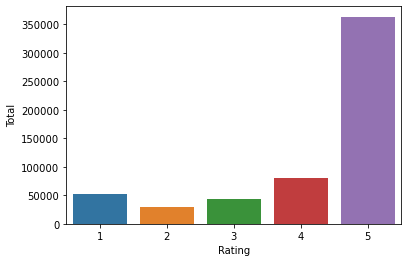

In [34]:
sns.barplot(x="Rating",y="Total", data=percent_plot)

# We can see that 5-star reviews constitute a large proportion (63.88%) of all reviews. The next most prevalent rating is 4-stars(14.18%), followed by 1-star (9.19%), 3-star (7.50%), and finally 2-star reviews (5.23%).

In [36]:
percent_plot["Percent"] = percent_plot["Total"].apply(lambda x: (x/total)*100)

In [37]:
percent_plot

,Rating,Total,Percent
0,5,363111,63.881769
1,4,80655,14.189557
2,1,52264,9.194755
3,3,42638,7.501262
4,2,29743,5.232657


<AxesSubplot:xlabel='Rating', ylabel='Percent'>

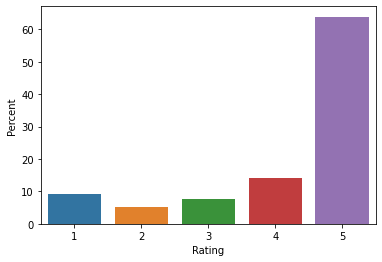

In [38]:
sns.barplot(x="Rating", y="Percent", data = percent_plot)

# b. Total number of reviews by unique profiles. How many customers or profiles have reviewed more than one product?

# Text Exploration

In [39]:
df.columns


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [40]:
df["word_count"] = df["Text"].apply(lambda x: len(str(x).split(" ")))
df[["Text","word_count"]].head()

,Text,word_count
0,I have bought several of the Vitality canned d...,49
1,Product arrived labeled as Jumbo Salted Peanut...,31
2,This is a confection that has been around a fe...,99
3,If you are looking for the secret ingredient i...,43
4,Great taffy at a great price. There was a wid...,30


In [41]:
# Checking the statistics of word count to check for range and average number of the words in each article.
df["word_count"].describe()

count    568411.000000
mean         82.008950
std          80.808843
min           3.000000
25%          34.000000
50%          58.000000
75%         100.000000
max        3526.000000
Name: word_count, dtype: float64

In [42]:
#Checking for top 20 most repeated words - Gives insights on data specific stop words.

common_words = pd.Series(' '.join(df["Text"]).split()).value_counts()
common_words[:20]

the     1628022
I       1388024
and     1228619
a       1163101
to       992344
of       789642
is       714256
it       631240
for      519980
in       512386
this     488303
that     400460
my       364014
with     336238
have     335281
but      324902
are      310922
was      307851
not      285042
you      280381
dtype: int64

In [43]:
# Checking 20 most uncommon words
common_words[-20:]

"shakey"               1
hand....You            1
hot...Its              1
expensive......My      1
drinkers....Doesn't    1
hot....its             1
butt...And             1
pot.....One            1
coffee....So           1
simple.....Put         1
"coax"                 1
didn't...Keep          1
process....Lets        1
better....But          1
CLOGS....Found         1
use...IT               1
"groves"               1
chip,or                1
"ceramic",             1
,product               1
dtype: int64

# Text Preprocessing

In [47]:

# Removing Stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [48]:
# Adding common words from our document to stop_words

add_words = ["the","I","and","a","to","of","is","it","for","in","this","that","my","with",     
"have",     
"but",      
"are",      
"was",      
"not",      
"you"]
stop_words = stop_words.union(add_words)


In [52]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [64]:
#Below Function is to clean the text and prepare it for the next phase.

from tqdm import tqdm
corpus = []

def clean_content(df):
    cleaned_content = []
    
    for sent in tqdm(df["Text"]):
        
        #Removing HTML comtent
        review_content = BeautifulSoup(sent).get_text()
        
        #Removing non-alphabetic charecters
        review_content = re.sub("[^a-zA-Z]"," ", review_content)
        
        #Tokenize the sentences
        words = word_tokenize(review_content.lower())
        
        #Removing the stop words
        sto_words_removed = [word for word in words if not word in stop_words]
        sto_words_removed = " ".join(sto_words_removed)
        corpus.append(sto_words_removed)
        cleaned_content.append(sto_words_removed)
        
    return (cleaned_content)

In [55]:
df["cleaned_text"] = clean_content(df)

  0%|                                                                             | 83/568411 [00:00<21:35, 438.57it/s]C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
100%|█████████████████████████████████████████████████████████████████████████| 568411/568411 [13:21<00:00, 708.98it/s]


In [65]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,word_count,cleaned_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,product arrived labeled jumbo salted peanuts p...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,99,confection around centuries light pillowy citr...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,43,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,30,great taffy great price wide assortment yummy ...


# Sentimental Analysis

Performed Sentiment Analysis to classify the Reviews into Positive or negative reviews.

Input:

Text column of the dataFrame.

Output:

Sentimental score report card with percentage of negative, positive, neutral and compound sentiment. Using this score report card, classified the sentence into possitive or negative sentence. 0 - Negative Sentence 1 - Positive Sentence

In [72]:
# Initializing the sentimental Intenity Analyzer
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [73]:
# checking the polarity scores for first 5 articles
for i in range(0,5):
    print(sid.polarity_scores(df.loc[i]["Text"]))

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}
{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}
{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468}


In [ ]:
#df["Text"][2]


In [74]:
df["sentimental_scores"] = df["Text"].apply(lambda x: sid.polarity_scores(x))

In [75]:
df["compound_sentiment"] = df["sentimental_scores"].apply(lambda score_dict: score_dict["compound"])

In [76]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,word_count,cleaned_text,sentimental_scores,compound_sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,bought several vitality canned dog food produc...,"{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp...",0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,product arrived labeled jumbo salted peanuts p...,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...",-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,99,confection around centuries light pillowy citr...,"{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'co...",0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,43,looking secret ingredient robitussin believe f...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,30,great taffy great price wide assortment yummy ...,"{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp...",0.9468


In [77]:
df["sentiment"] = df["compound_sentiment"].apply(lambda x: 1 if x >= 0 else 0)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,word_count,cleaned_text,sentimental_scores,compound_sentiment,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,bought several vitality canned dog food produc...,"{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp...",0.9441,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,product arrived labeled jumbo salted peanuts p...,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...",-0.5664,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,99,confection around centuries light pillowy citr...,"{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'co...",0.8265,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,43,looking secret ingredient robitussin believe f...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,30,great taffy great price wide assortment yummy ...,"{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp...",0.9468,1


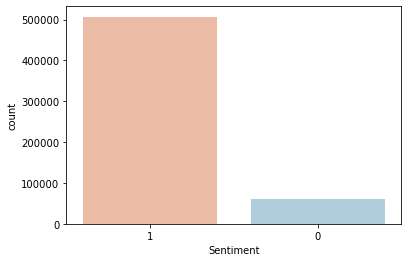

In [79]:
#We can observe that the dataset mostly consists of positive sentiments which is shown in the below graph.

sns.countplot(x="sentiment", order = [1,0], data=df, palette='RdBu')
plt.xlabel("Sentiment")
plt.show()

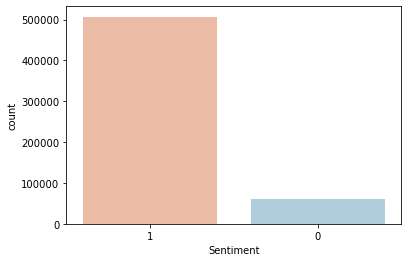

In [80]:
sns.countplot(x="sentiment", order = [1,0], data=df, palette='RdBu')
plt.xlabel("Sentiment")
plt.show()